# 📈 Dashboard Executivo - Logística

## Visão Geral
Dashboard interativo com os principais KPIs e métricas operacionais.

---

In [1]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

print("✅ Dashboard inicializado!")

✅ Dashboard inicializado!


In [2]:
# Carregar dados
dados_logistica = pd.read_csv('../data/dados_logistica.csv')
dados_mensais = pd.read_csv('../data/dados_mensais.csv')
tabela_acoes = pd.read_csv('../data/tabela_acoes.csv')

dados_logistica['Data'] = pd.to_datetime(dados_logistica['Data'])

print("✅ Dados carregados!")

✅ Dados carregados!


## 📊 KPIs Principais

In [3]:
# Calcular KPIs
kpis = {
    'Margem Média': f"{dados_logistica['Margem %'].mean():.1f}%",
    'Custo/KM': f"R$ {dados_logistica['Custo/KM'].mean():.4f}",
    'Entregas Totais': f"{dados_logistica['Entregas'].sum():,.0f}",
    'KM Totais': f"{dados_logistica['KM Percorridos'].sum():,.0f}",
    'Dias Críticos': f"{len(dados_logistica[dados_logistica['Margem %'] < 20])} ({len(dados_logistica[dados_logistica['Margem %'] < 20])/len(dados_logistica)*100:.1f}%)",
    'Potencial Economia': f"R$ {tabela_acoes['Impacto'].sum():,.0f}"
}

# Exibir KPIs
print("=" * 80)
print("KPIS PRINCIPAIS")
print("=" * 80)
for kpi, valor in kpis.items():
    print(f"📊 {kpi}: {valor}")

KPIS PRINCIPAIS
📊 Margem Média: 28.1%
📊 Custo/KM: R$ 0.1859
📊 Entregas Totais: 31,137
📊 KM Totais: 3,118,903
📊 Dias Críticos: 84 (30.7%)
📊 Potencial Economia: R$ 382,000


## 📈 Dashboard Visual

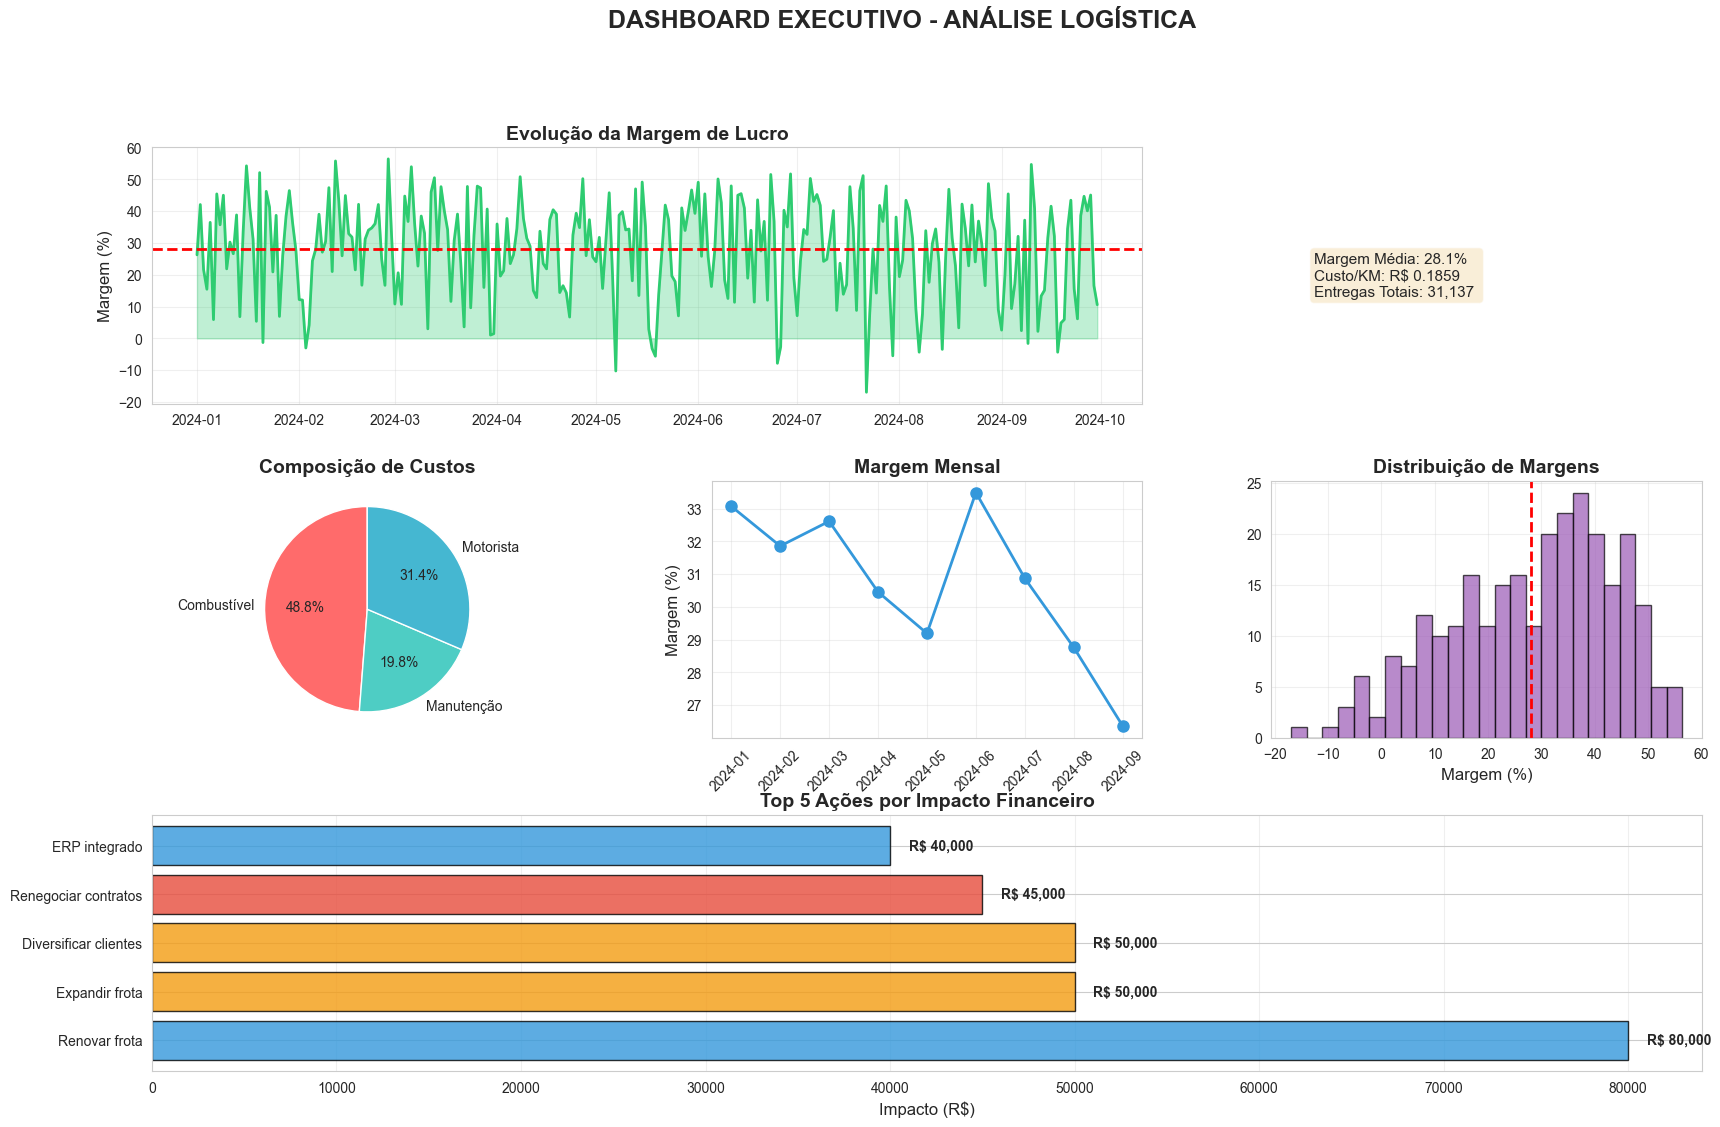

✅ Dashboard gerado com sucesso!


In [6]:
# Criar dashboard completo
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Evolução da Margem
ax1 = fig.add_subplot(gs[0, :2])
dados_sorted = dados_logistica.sort_values('Data')
ax1.plot(dados_sorted['Data'], dados_sorted['Margem %'], color='#2ECC71', linewidth=2)
ax1.fill_between(dados_sorted['Data'], dados_sorted['Margem %'], alpha=0.3, color='#2ECC71')
ax1.axhline(y=dados_logistica['Margem %'].mean(), color='red', linestyle='--', linewidth=2)
ax1.set_title('Evolução da Margem de Lucro', fontsize=14, fontweight='bold')
ax1.set_ylabel('Margem (%)', fontsize=12)
ax1.grid(alpha=0.3)

# 2. KPIs em Cards
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')
kpi_text = '\n'.join([f"{k}: {v} " for k, v in list(kpis.items())[:3]])
ax2.text(0.1, 0.5, kpi_text, fontsize=11, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 3. Composição de Custos
ax3 = fig.add_subplot(gs[1, 0])
custos = [
    dados_logistica['Custo Combustível'].sum(),
    dados_logistica['Custo Manutenção'].sum(),
    dados_logistica['Custo Motorista'].sum()
]
labels = ['Combustível', 'Manutenção', 'Motorista']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
ax3.pie(custos, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax3.set_title('Composição de Custos', fontsize=14, fontweight='bold')

# 4. Tendência Mensal
ax4 = fig.add_subplot(gs[1, 1])
dados_mensais_sorted = dados_mensais.sort_values('Mês')
x = range(len(dados_mensais_sorted))
ax4.plot(x, dados_mensais_sorted['Margem %'], marker='o', color='#3498DB', linewidth=2, markersize=8)
ax4.set_xticks(x)
ax4.set_xticklabels(dados_mensais_sorted['Mês'], rotation=45)
ax4.set_title('Margem Mensal', fontsize=14, fontweight='bold')
ax4.set_ylabel('Margem (%)', fontsize=12)
ax4.grid(alpha=0.3)

# 5. Distribuição de Margens
ax5 = fig.add_subplot(gs[1, 2])
ax5.hist(dados_logistica['Margem %'], bins=25, color='#9B59B6', alpha=0.7, edgecolor='black')
ax5.axvline(dados_logistica['Margem %'].mean(), color='red', linestyle='--', linewidth=2)
ax5.set_title('Distribuição de Margens', fontsize=14, fontweight='bold')
ax5.set_xlabel('Margem (%)', fontsize=12)
ax5.grid(alpha=0.3)

# 6. Top Ações por Impacto
ax6 = fig.add_subplot(gs[2, :])
top_acoes = tabela_acoes.nlargest(5, 'Impacto')
cores_prioridade = {'Urgente': '#E74C3C', 'Prioritária': '#F39C12', 'Planejada': '#3498DB'}
cores = [cores_prioridade[p] for p in top_acoes['Prioridade']]
bars = ax6.barh(top_acoes['Ação'], top_acoes['Impacto'], color=cores, alpha=0.8, edgecolor='black')
ax6.set_xlabel('Impacto (R$)', fontsize=12)
ax6.set_title('Top 5 Ações por Impacto Financeiro', fontsize=14, fontweight='bold')
ax6.grid(axis='x', alpha=0.3)

for i, v in enumerate(top_acoes['Impacto']):
    ax6.text(v + 1000, i, f'R$ {v:,.0f}', va='center', fontweight='bold')

plt.suptitle('DASHBOARD EXECUTIVO - ANÁLISE LOGÍSTICA', fontsize=18, fontweight='bold', y=0.995)
plt.show()

print("✅ Dashboard gerado com sucesso!")